In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import randn, randint, uniform, sample

In [3]:
df = pd.DataFrame(randn(1000), index = pd.date_range('2019-06-07', periods = 1000), columns=['value'])
ts = pd.Series(randn(1000), index = pd.date_range('2019-06-07', periods = 1000))
df.head()

,value
2019-06-07,-0.423612
2019-06-08,-1.009721
2019-06-09,-0.396008
2019-06-10,0.455332
2019-06-11,-0.679488


##### A cumulative sum is a sequence of partial sums of a given sequence. For example, the cumulative sums of the sequence {a,b,c,...}, are a, a+b, a+b+c,

In [4]:
df['value'] = df['value'].cumsum()
df.head()

,value
2019-06-07,-0.423612
2019-06-08,-1.433333
2019-06-09,-1.829341
2019-06-10,-1.374008
2019-06-11,-2.053496


<AxesSubplot:>

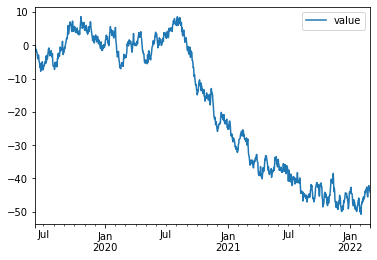

In [5]:
df.plot()

In [6]:
ts = ts.cumsum()
ts.head()

2019-06-07    0.187804
2019-06-08    0.428442
2019-06-09   -1.220776
2019-06-10   -0.231312
2019-06-11    0.027854
Freq: D, dtype: float64

In [7]:
type(df), type(ts)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

<AxesSubplot:>

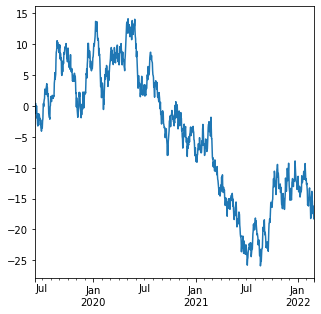

In [8]:
ts.plot(figsize=(5,5))

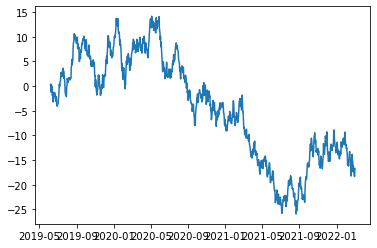

In [9]:
plt.plot(ts)

<AxesSubplot:>

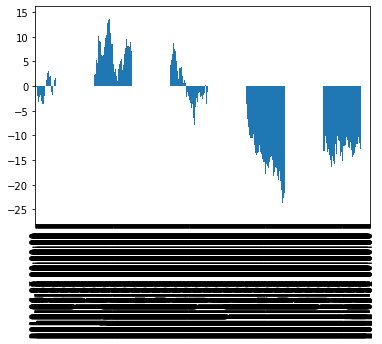

In [10]:
# In the x axis all the indexes are mentioned so it's not visible, we can increase the figure size
ts.plot(kind = 'bar')

<AxesSubplot:>

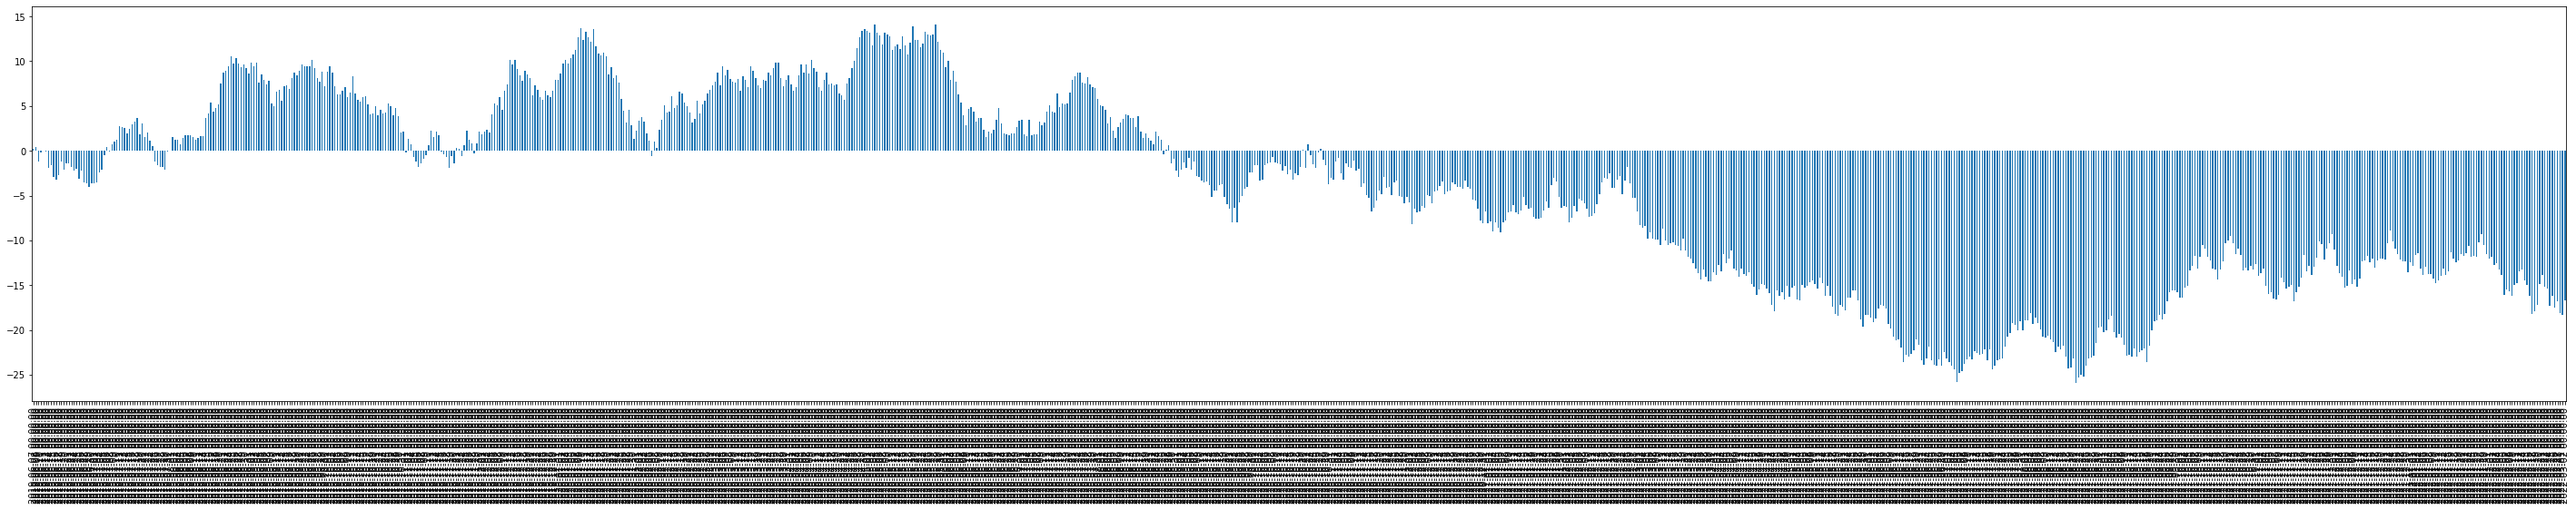

In [11]:
ts.plot(kind = 'bar', figsize=(50, 8))

<AxesSubplot:>

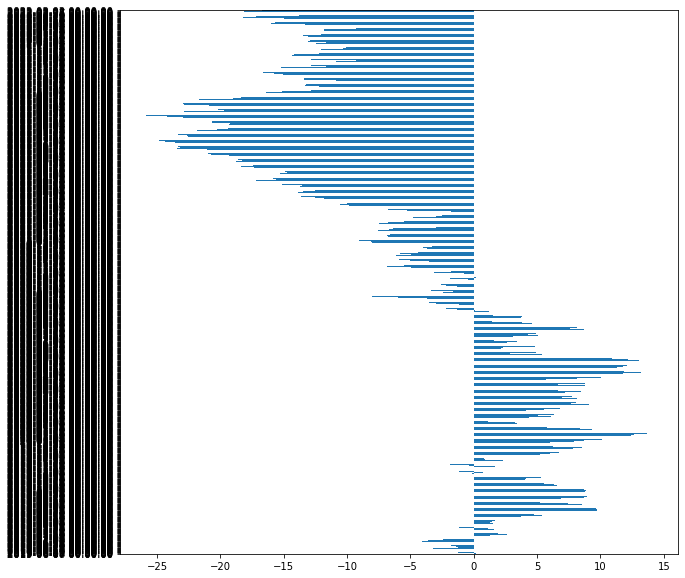

In [12]:
ts.plot(kind = 'barh', figsize=(10, 10))

### Iris dataset

In [13]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris.dropna(how='all', inplace=True)

<AxesSubplot:>

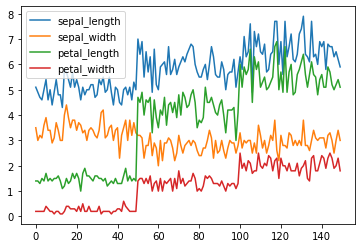

In [15]:
# Just using plot we can just get a graph with certian properties by default. 
iris.plot()

Text(0, 0.5, 'Y Axis (length or width)')

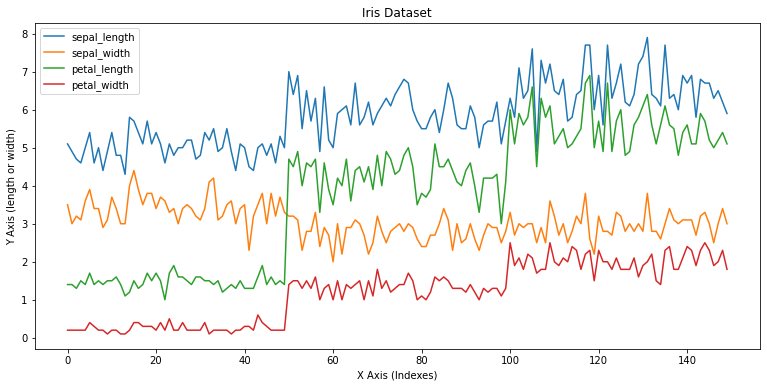

In [16]:
# We can add more properties
graph = iris.plot(figsize=(13,6), title='Iris Dataset')
graph.set_xlabel('X Axis (Indexes)')
graph.set_ylabel('Y Axis (length or width)')


<AxesSubplot:>

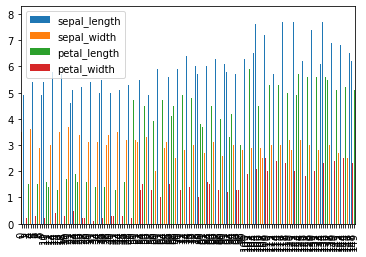

In [17]:
iris.plot(kind='bar')

In [18]:
iris_data = iris.drop(['species'], axis = 1)

In [19]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

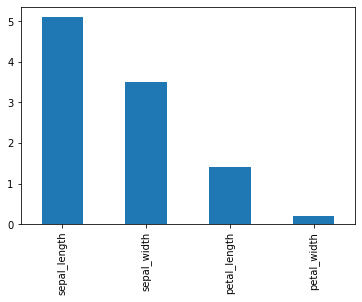

In [20]:
iris_data.iloc[0].plot(kind='bar')

<AxesSubplot:>

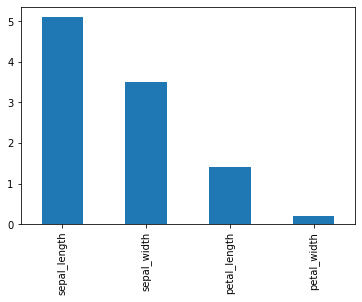

In [21]:
iris_data.iloc[0].plot.bar()

In [22]:
iris_data['sepal_length'].sort_values().head(10)

13    4.3
42    4.4
38    4.4
8     4.4
41    4.5
22    4.6
3     4.6
6     4.6
47    4.6
2     4.7
Name: sepal_length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

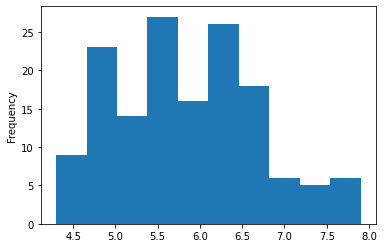

In [23]:
# How many values are present in a certain range (9 values between 4.3 to 4.6)
iris_data['sepal_length'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

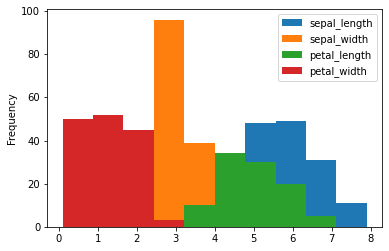

In [24]:
iris_data.plot.hist()

<AxesSubplot:ylabel='Frequency'>

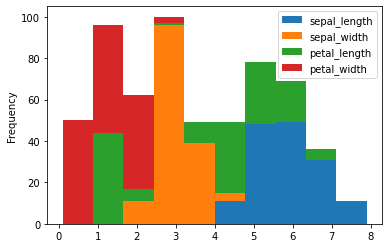

In [25]:
# stacked will shown the small bar in the foreground and bigger bar in the backgroud. By default it's false
iris_data.plot(kind='hist', stacked=True)

<AxesSubplot:ylabel='Frequency'>

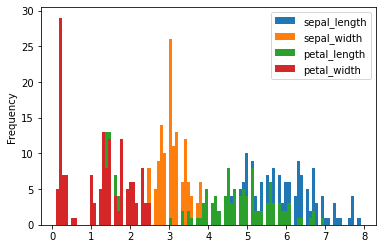

In [26]:
# bin is used to control the width of the bar
iris_data.plot(kind = 'hist', stacked = False, bins = 100)

<AxesSubplot:xlabel='Frequency'>

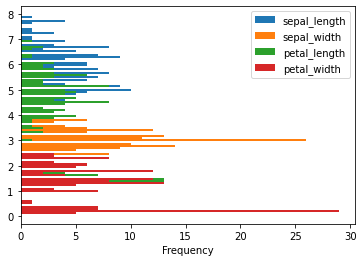

In [27]:
iris_data.plot(kind = 'hist', stacked = False, bins = 100, orientation='horizontal')

<AxesSubplot:ylabel='Frequency'>

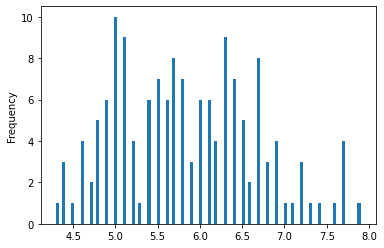

In [28]:
iris_data.sepal_length.plot(kind = 'hist', stacked = False, bins = 100)

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

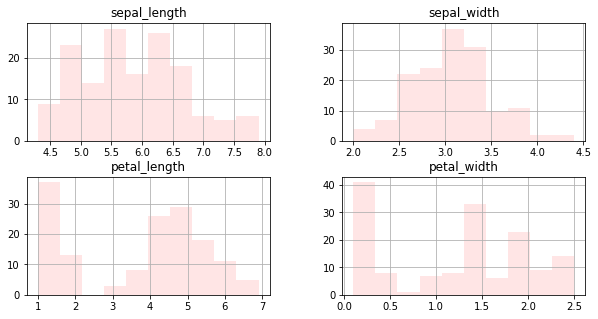

In [29]:
# alpha means color contrast of the graph
iris_data.hist(color ='r', alpha=0.1, figsize=(10,5))

#### Difference between iris_data.hist() and iris_data.plot()

<AxesSubplot:ylabel='Frequency'>

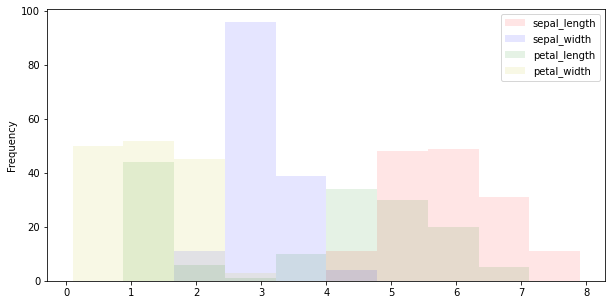

In [30]:
iris_data.plot(color =['r', 'b', 'g', 'y'], alpha=0.1, figsize=(10,5), kind='hist')

#### Is there a relationship between 2 columns (how sepal length is behaving against sepal width etc), we can use scatter plot

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

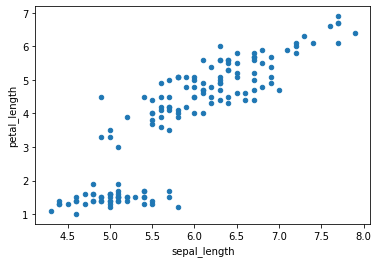

In [31]:
iris_data.plot.scatter(x = 'sepal_length', y = 'petal_length')

#### it's not clear but we can see that as sepal_length increases, the petal_length also increases

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

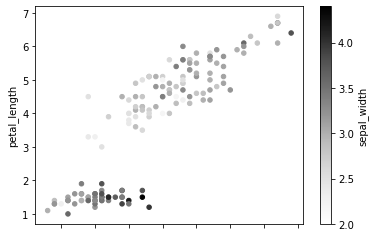

In [32]:
iris_data.plot.scatter(x = 'sepal_length', y = 'petal_length', c = 'sepal_width')

In [33]:
iris_data.iloc[0]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

##### The third axis 'c' is used to define a color, if any column name is provided instead of an normal color name, then a label with points will be created. Here a sepal_width's points are created. 
##### E.g, take 5.1 of sepal length and 1.4 of petal length, the value of sepal_width is 3.5 and in the label what the color 3.5 gives, it will be provided

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

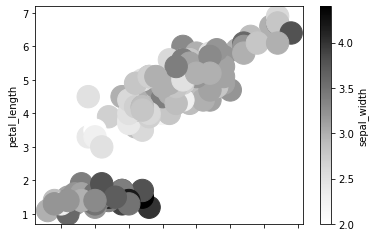

In [34]:
iris_data.plot.scatter(x = 'sepal_length', y = 'petal_length', c = 'sepal_width', s = 500)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

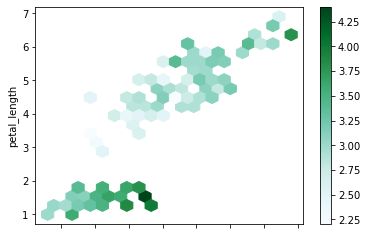

In [35]:
iris_data.plot.hexbin(x = 'sepal_length', y = 'petal_length', C = 'sepal_width', gridsize=20)

In [60]:
data = pd.DataFrame(np.array([[1,2,3], [1,2,3]]))
data

,0,1,2
0,1,2,3
1,1,2,3


array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>,
       <AxesSubplot:ylabel='2'>], dtype=object)

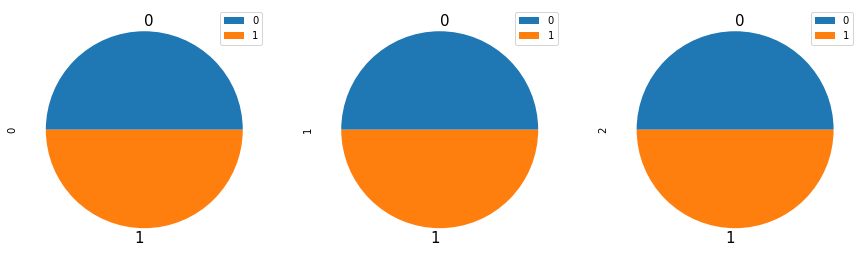

In [75]:
data.plot.pie(subplots = True, figsize = (15, 15), fontsize = 15)

In [64]:
#iris_data.plot.pie(subplots = True, figsize = (5, 5))

In [76]:
[0.1]*4

[0.1, 0.1, 0.1, 0.1]

In [79]:
series = pd.Series([0.2]*5, index = ['a','b','c', 'd','e'], name = 'Pie Plot')
series

a    0.2
b    0.2
c    0.2
d    0.2
e    0.2
Name: Pie Plot, dtype: float64

<AxesSubplot:ylabel='Pie Plot'>

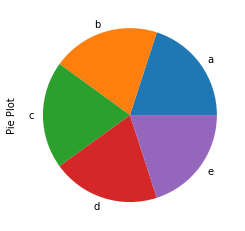

In [80]:
series.plot.pie()

In [101]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_

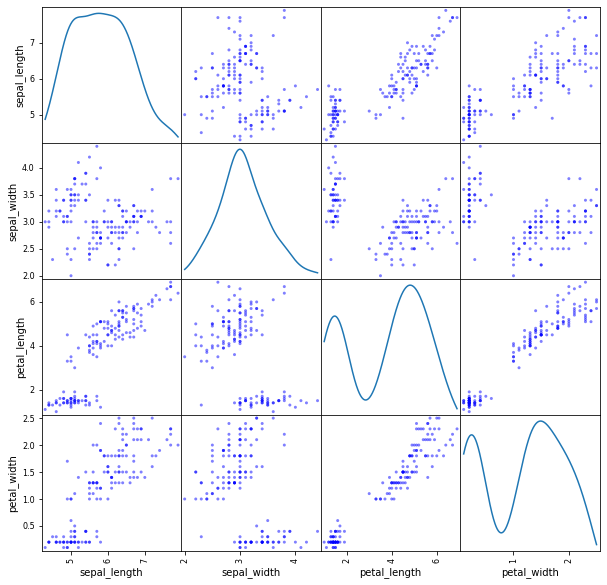

In [102]:
scatter_matrix(iris_data, figsize=(10,10), diagonal='kde', color='b')

<AxesSubplot:>

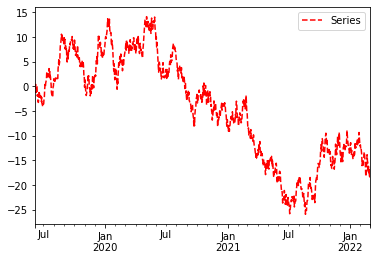

In [103]:
ts.plot(style = 'r--', label = 'Series', legend = True)

<AxesSubplot:>

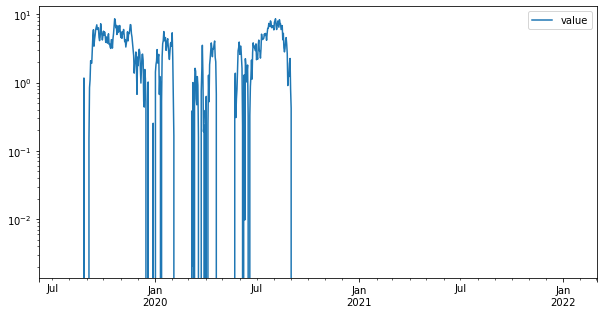

In [104]:
df.plot(legend = True, figsize = (10, 5), logy = True)

In [109]:
x = iris_data.drop(['sepal_width', 'petal_width'], axis = 1)
x.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [110]:
y = iris_data.drop(['sepal_length', 'petal_length'], axis = 1)
y.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


<AxesSubplot:label='61c89de4-0e59-4832-85fa-ee3919bad776'>

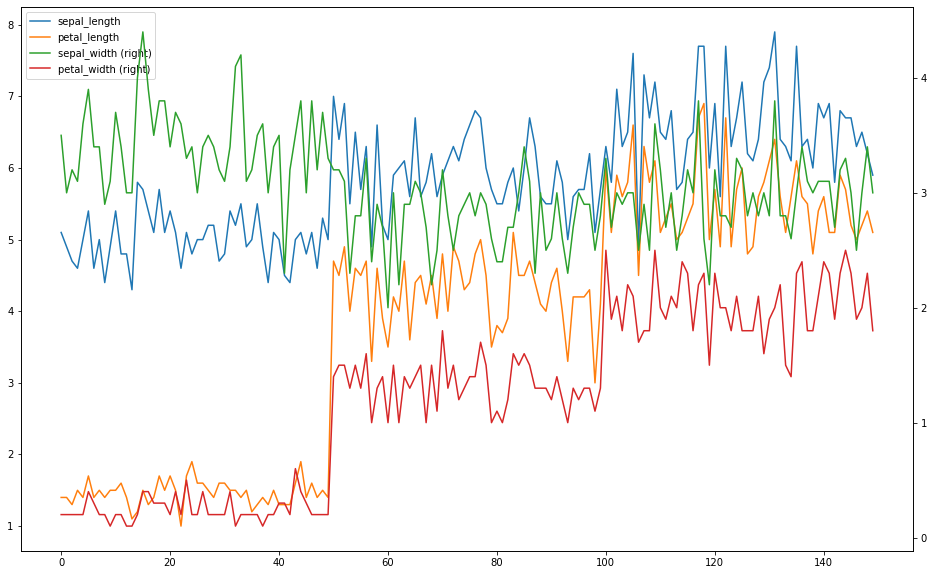

In [111]:
ax = x.plot()
y.plot(figsize = (16,10), secondary_y=True, ax = ax)

In [118]:
iris_data = iris

In [120]:
iris_data.drop(['species'], axis=1, inplace = True)

In [130]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:>

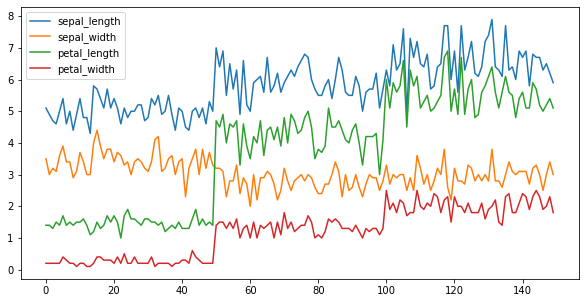

In [134]:
iris_data.plot(figsize=(10,5), x_compat = True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

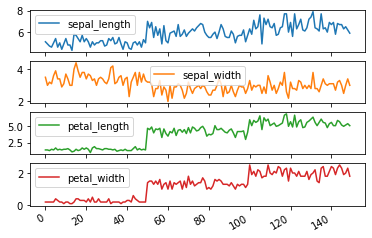

In [135]:
iris_data.plot(subplots = True)

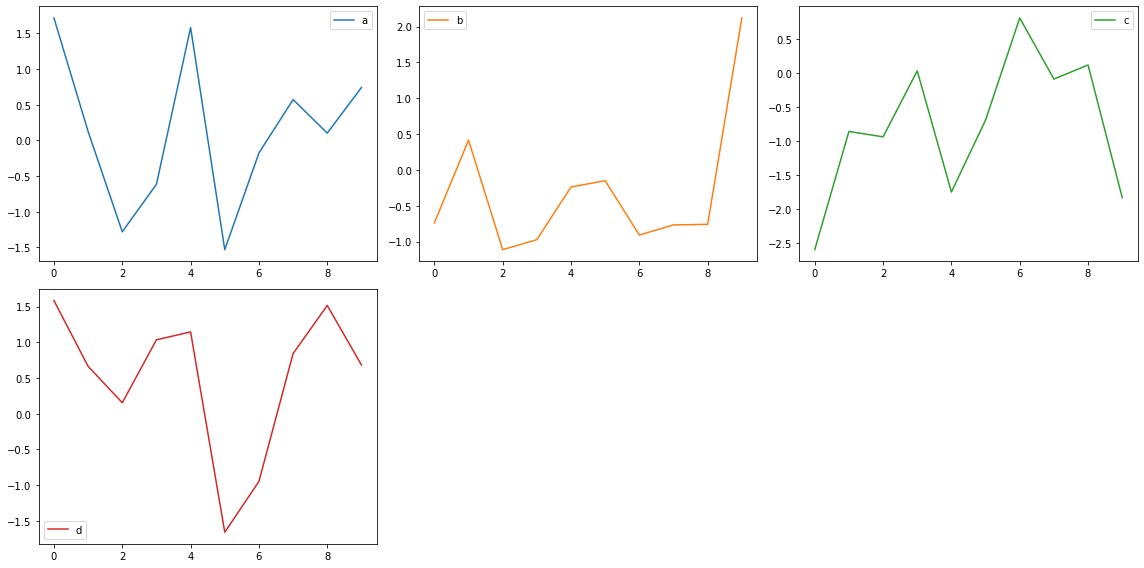

In [137]:
# layout = (2,3) means 2 rows and 3 columns
df.plot(subplots = True, sharex = False, layout = (2,3), figsize = (16,8))
plt.tight_layout()

In [106]:
df = pd.DataFrame(randn(10, 4), columns=['a', 'b', 'c', 'd'])
df.head(10)

,a,b,c,d
0,1.715689,-0.739220,-2.599176,1.585190
1,0.124223,0.415342,-0.861670,0.664865
2,-1.280367,-1.112086,-0.940505,0.154447
3,-0.615364,-0.973338,0.029686,1.036007
4,1.581410,-0.238387,-1.751820,1.146673
5,-1.530811,-0.150175,-0.694155,-1.658243
6,-0.176437,-0.908710,0.807238,-0.946579
7,0.572116,-0.767300,-0.091037,0.843381
8,0.102374,-0.759846,0.116124,1.516916
9,0.740811,2.119503,-1.834560,0.683662


<AxesSubplot:>

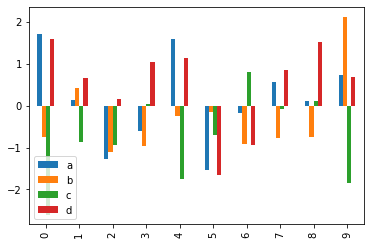

In [107]:
df.plot(kind = 'bar')

<AxesSubplot:>

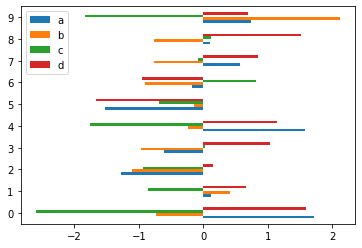

In [108]:
df.plot(kind = 'barh')